# PySOM Graph API Demo

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

# PYSOM LIBRARY MODULES:
import pysom
from pysom.node import Node
from pysom.graph import Graph
from pysom.nodes.bmu import BMU
from pysom.nodes.dist import Dist
from pysom.nodes.concat import Concat
from pysom.nodes.calibrate import Calibrate
from pysom.nodes.som import SOM, nhood_mexican, nhood_bubble, nhood_gaussian, dist_manhattan, dist_cosine

## Default (node)

    input -> node -> output


In [2]:
data = [
    [1, 2, 3],
    [1, 2, 3],
    [1, 2, 3]
]
data = np.array(data)

### CODE ###

g = Graph()

node = g.create(Node)

g.connect(g.start, node, 1)
g.connect(node, g.end, 1)

g.set_input(np.array(data))

print(g.get_output())

[[1 2 3]
 [1 2 3]
 [1 2 3]]


## Distribute
                    


    input -> dist
                 \
                (0,2)
                   \
                    *-> output

In [3]:
data = [
    [1, 3, 2],
    [1, 3, 2],
    [1, 3, 2]
]
data = np.array(data)

### CODE HERE ###

g = Graph()

sel = [(1, [0, 2]), (1, [1])]

dist = g.create(Dist, {'selections': sel})

g.connect(g.start, dist, 1)
g.connect(dist, g.end, 1)

g.set_input(data)

print(g.get_output())

[[1 2]
 [1 2]
 [1 2]]


## Distribute and Concatenate

                   *-> node1 ->*
                  /             \
                (1)              \
                /                 \
    input -> dist                 concat -> output
                \                 /
                (0,2)            /
                  \             /
                   *-> node2 ->*

In [4]:
data = [
    [1, 3, 2],
    [1, 3, 2],
    [1, 3, 2]
]
data = np.array(data)

### CODE HERE ###

g = Graph()

sel = [(1, [0, 2]), (1, [1])]

dist = g.create(Dist, {'selections': sel})

g.connect(g.start, dist, 1)

node1 = g.create(Node)
node2 = g.create(Node)

g.connect(dist, node1, 1)
g.connect(dist, node2, 2)

con = g.create(Concat, {'axis': 1})

g.connect(node1, con, 1)
g.connect(node2, con, 1)
g.connect(con, g.end, 1)

g.set_input(data)

print(g.get_output())

[[1 2 3]
 [1 2 3]
 [1 2 3]]


# Graph Example: SOM Calibrated on Animal Data

  
    animal 
          \
           SOM
             \
              calibrate(labels) -> output

### Load Animal Data

In [5]:
animal = ['Dove', 'Chicken', 'Duck', 'Goose', 'Owl', 'Hawk', 'Eagle', 'Fox', 'Dog', 'Wolf', 'Cat', 'Tiger', 'Lion', 'Horse', 'Zebra', 'Cow']
features = [
    [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],    # Dove
    [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],    # Chicken
    [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1],    # Duck
    [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1],    # Goose
    [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],    # Owl
    [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],    # Hawk
    [0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],    # Eagle
    [0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0],    # Fox
    [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],    # Dog
    [0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0],    # Wolf
    [1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0],    # Cat
    [0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0],    # Tiger
    [0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0],    # Lion
    [0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0],    # Horse
    [0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0],    # Zebra
    [0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]     # Cow
]

feats = pd.DataFrame(features)
feats.columns = ['Small', 'Medium', 'Big', '2-legs', '4-legs', 'Hair', 'Hooves', 'Mane', 'Feathers', 'Hunt', 'Run', 'Fly', 'Swim']
feats

,Small,Medium,Big,2-legs,4-legs,Hair,Hooves,Mane,Feathers,Hunt,Run,Fly,Swim
0,1,0,0,1,0,0,0,0,1,0,0,1,0
1,1,0,0,1,0,0,0,0,1,0,0,0,0
2,1,0,0,1,0,0,0,0,1,0,0,0,1
3,1,0,0,1,0,0,0,0,1,0,0,1,1
4,1,0,0,1,0,0,0,0,1,1,0,1,0
5,1,0,0,1,0,0,0,0,1,1,0,1,0
6,0,1,0,1,0,0,0,0,1,1,0,1,0
7,0,1,0,0,1,1,0,0,0,1,0,0,0
8,0,1,0,0,1,1,0,0,0,0,1,0,0
9,0,1,0,0,1,1,0,1,0,1,1,0,0


### Helper Plot Function

In [6]:
plt.rcParams["figure.figsize"] = (14, 7)

def plot_features(size, out):
    for bmu, labels in out.items():
        labels = list(labels)
        print(labels)

        for i in range(len(labels)):
            plt.text(bmu[0] + 0.1, bmu[1] + (i + 1) / len(labels) - 0.35, labels[i], fontsize=15)

    plt.xticks(np.arange(size + 1))
    plt.yticks(np.arange(size + 1))
    plt.grid()
    plt.show()

## Train SOM on Animal Data

['Dove', 'Chicken', 'Duck', 'Goose']
['Owl', 'Hawk']
['Eagle']
['Fox', 'Dog', 'Wolf']
['Cat']
['Tiger']
['Lion']
['Horse', 'Zebra']
['Cow']


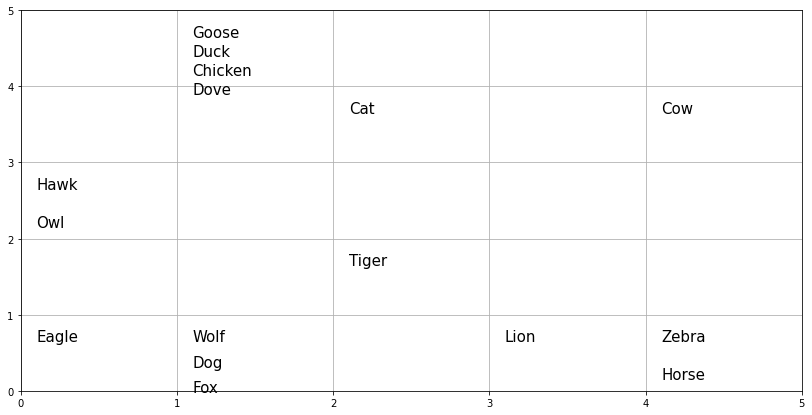

In [7]:

### CODE HERE ###

size = 5
g = Graph()

som = g.create(SOM, props={'size': size, 'dim': 13, "nhood": nhood_mexican, 'sigma': 13, 'lr': 0.8, 'n_iters': 10000})
g.connect(g.start, som, 1)

cal = g.create(Calibrate, props={"labels": animal})


g.connect(som, cal, 0)
g.connect(cal, g.end, 1)

data = scale(feats.values)

g.set_input(data)
out = g.get_output()
plot_features(size, out)